# Data Preprocessing and Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

#### 1. Loading and exploring the dataset

In [3]:
file_path= '/content/drive/MyDrive/UberFarePrediction/uber.csv'
df= pd.read_csv(file_path)

In [4]:
print("Shape:", df.shape)

Shape: (200000, 9)


In [5]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
#check first few rows
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

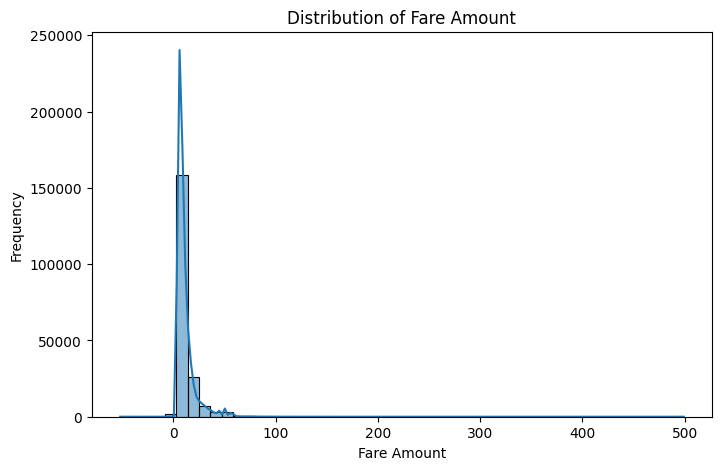

In [ ]:
#distribution of target variable(fare_amount)
plt.figure(figsize=(8,5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

From the graph we can see that the fare distribution is highly right-skewed, with most fares between 0–20 dollars, but it also contains negative values and very high fares (above 200$), likely due to errors or rare trips, which need to be handled to avoid bias in modeling.


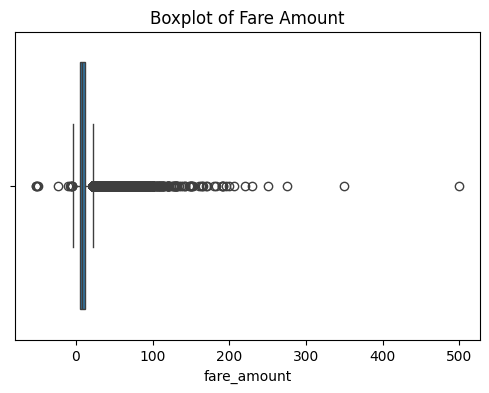

In [ ]:
#checking for outliers(boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.show()

The boxplot shows that the median fare is around 10 dollars, with most rides in a low range, but many outliers exist, including invalid negative fares and very high ones above 200, confirming the right-skewed distribution and the need for preprocessing.


#### 2. Handling missing/invalid data

In [7]:
#removing invalid fares
df= df[df['fare_amount'] > 0]

#removing extreme outliers
df= df[df['fare_amount'] <= 200]

In [8]:
#remove rows with 0 coordinates
df= df[(df['pickup_latitude'] != 0) & (df['pickup_longitude'] != 0) &
        (df['dropoff_latitude'] != 0) & (df['dropoff_longitude'] != 0)]

print("Dataset shape after cleaning fares + coordinates:", df.shape)


Dataset shape after cleaning fares + coordinates: (196009, 9)


In [9]:
#check missing values
print("Missing values:", df.isnull().sum())

Missing values: Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [10]:
#since only dropoff coordinates have missing values(one in each)
df= df.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])
print("Missing values after cleaning:", df.isnull().sum())

Missing values after cleaning: Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


#### 3. Feature Engineering

In [11]:
#convert pickup_datetime to datetime format
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'], errors='coerce')

#extract time-based features
df['hour']= df['pickup_datetime'].dt.hour
df['day_of_week']= df['pickup_datetime'].dt.dayofweek
df['month']= df['pickup_datetime'].dt.month
df['rush_hour']= df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

In [12]:
#calculate distance(Haversine formula: to calculate the shortest distance between two points on earth)
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R= 6371 #avg earth's radius
    dlon= radians(lon2 - lon1)
    dlat= radians(lat2 - lat1)
    a= sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c= 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

df.loc[:, 'trip_distance']= df.apply(
    lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                          row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [13]:
#remove unrealistic distances
df= df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]

In [14]:
#distance categories
def distance_category(d):
    if d < 2: return "Short"
    elif d < 10: return "Medium"
    else: return "Long"

df.loc[:, 'trip_length'] = df['trip_distance'].apply(distance_category)

print("New features added:", ['hour', 'day_of_week', 'month', 'rush_hour', 'trip_distance', 'trip_length'])

New features added: ['hour', 'day_of_week', 'month', 'rush_hour', 'trip_distance', 'trip_length']


In [15]:
print(df[['hour', 'day_of_week', 'month', 'rush_hour', 'trip_distance', 'trip_length']].head())

   hour  day_of_week  month  rush_hour  trip_distance trip_length
0    19            3      5          1       1.683323       Short
1    20            4      7          0       2.457590      Medium
2    21            0      8          0       5.036377      Medium
3     8            4      6          1       1.661683       Short
4    17            3      8          1       4.475450      Medium


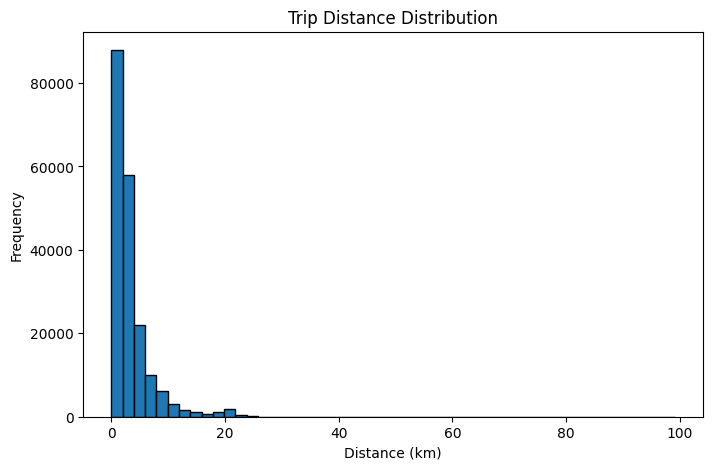

In [16]:
#trip distance histogram
plt.figure(figsize=(8,5))
plt.hist(df['trip_distance'], bins=50, edgecolor='black')
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

In [17]:
df= pd.get_dummies(df, columns=['trip_length'], drop_first=True)

In [20]:
df= df.drop(columns=[
    'Unnamed: 0',
    'key',
    'pickup_datetime',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude'
])

#### 4. Splitting the dataset

In [21]:
from sklearn.model_selection import train_test_split

#drop unnecessary columns
X= df.drop(columns=['fare_amount'])
y= df['fare_amount']

#train-test split(80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (155099, 8)
Testing set size: (38775, 8)


#### 5. Data Scaling/Normalization

In [22]:
from sklearn.preprocessing import StandardScaler

#initialize the scaler
scaler= StandardScaler() #makes each feature mean=0 and std=1

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print("Feature Scaling applied.")

Feature Scaling applied.


#### 6. Correlation Analysis

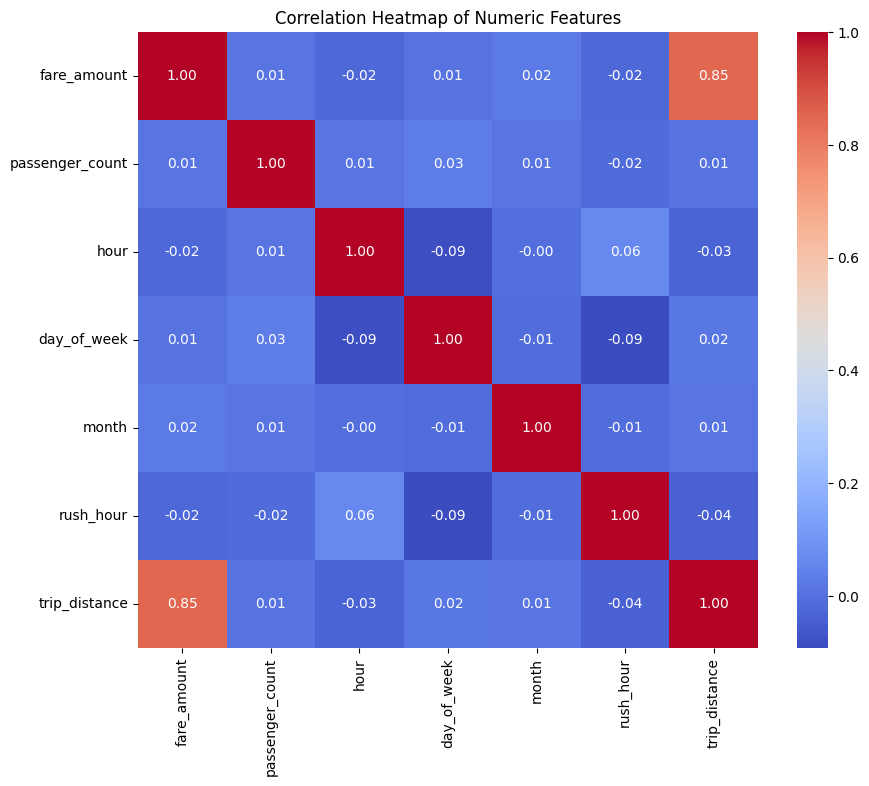

In [23]:
#select numeric features only
numeric_cols= df.select_dtypes(include=['number']).columns

#compute correlation matrix
corr_matrix= df[numeric_cols].corr()

#plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The heatmap shows that fare_amount has a moderate positive correlation with trip_distance, confirming that longer trips generally cost more. Time-based features(hour, day_of_week, month) have weak correlations with fare, suggesting they may influence demand patterns but not directly determine fare.

In [24]:
df_final= df
df_final.to_csv("/content/drive/MyDrive/UberFarePrediction/cleaned_uber_data.csv", index=False)
print("Dataset saved.")

Dataset saved.
